In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter

import geocat.datafiles as gdf
import geocat.viz as gv

In [2]:
# Read in data:

# Open a netCDF data file using xarray default engine and load the data into xarrays
sst_in = xr.open_dataset(gdf.get("netcdf_files/sst8292.nc"))
uv_in = xr.open_dataset(gdf.get("netcdf_files/uvt.nc"))

# Use date as the dimension rather than time
sst_in = sst_in.set_coords("date").swap_dims({"time": "date"}).drop_vars('time')
uv_in = uv_in.set_coords("date").swap_dims({"time": "date"}).drop_vars('time')


In [3]:
# Extract required variables
# Read SST and U, V for Jan 1988 (at 1000 mb for U, V)
# Note that we could use .isel() if we know the indices of date and lev
sst = sst_in['SST'].sel(date=198801)
u = uv_in['U'].sel(date=198801, lev=1000)
v = uv_in['V'].sel(date=198801, lev=1000)

# Read in grid information
lat_uv = u['lat']
lon_uv = u['lon']

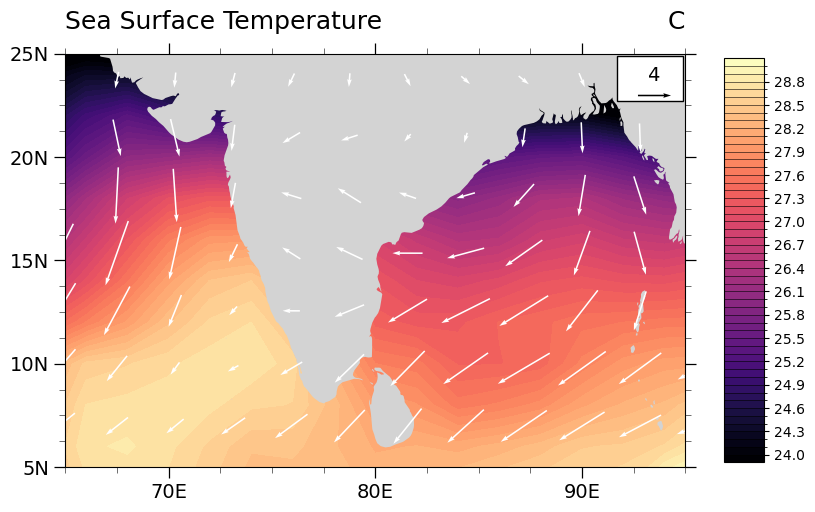

In [17]:
# Plot:

# Define map projection to use
proj = ccrs.PlateCarree()

# Generate figure (set its size (width, height) in inches)
plt.figure(figsize=(10, 7))

# Define axis using Cartopy and zoom in on the region of interest
ax = plt.axes(projection=proj)
ax.set_extent((66, 96, 5, 25), crs=ccrs.PlateCarree())

# Create the filled contour plot
sst_plot = sst.plot.contourf(
    ax=ax,
    transform=proj,
    levels=51,
    vmin=24,
    vmax=29,
    cmap="magma",
    add_colorbar=False,
)

# Remove default x and y labels from plot
plt.xlabel("")
plt.ylabel("")

# add land feature
ax.add_feature(cfeature.LAND, facecolor="lightgrey", zorder=1)

# Add vectors onto the plot
Q = plt.quiver(
    lon_uv,
    lat_uv,
    u,
    v,
    color='white',
    pivot='middle',
    width=.0025,
    scale=75,
)

# Use geocat-viz utility function to format title
gv.set_titles_and_labels(ax,
                         maintitle='',
                         maintitlefontsize=18,
                         lefttitle="Sea Surface Temperature",
                         lefttitlefontsize=18,
                         righttitle="C",
                         righttitlefontsize=18,
                         xlabel=None,
                         ylabel=None,
                         labelfontsize=16)

# Format tick labels as latitude and longitudes
gv.add_lat_lon_ticklabels(ax=ax)

# Use geocat-viz utility function to customize tick marks
gv.set_axes_limits_and_ticks(ax,
                             xlim=(65, 95),
                             ylim=(5, 25),
                             xticks=range(70, 95, 10),
                             yticks=range(5, 27, 5))

# Remove degree symbol from tick labels
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

# Add minor tick marks
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=4,
                         labelsize=14)

# Draw the key for the quiver plot as a rectangle patch
rect = mpl.patches.Rectangle(
    (91.7, 22.7),  # (x, y)
    3.2,  # width
    2.2,  # height
    facecolor='white',
    edgecolor='k',
)
ax.add_patch(rect)

qk = ax.quiverkey(
    Q,  # the quiver instance
    0.95,  # x position of the key
    0.9,  # y position of the key
    4,  # length of the key
    '4',  # label for the key
    labelpos='N',  # position the label to the 'north' of the arrow
    color='black',
    coordinates='axes',
    fontproperties={'size': 14},
    labelsep=0.1,  # Distance between arrow and label
)

# Add and customize colorbar
cbar_ticks = np.arange(24, 28.8, .3)
plt.colorbar(ax=ax,
             mappable=sst_plot,
             extendrect=True,
             extendfrac='auto',
             shrink=0.75,
             aspect=10,
             ticks=cbar_ticks,
             drawedges=True)

# Show the plot
plt.show()


/Users/jkent/miniconda3/envs/geocat-examples/lib/python3.11/site-packages/matplotlib/patches.py:3355: RuntimeWarning: invalid value encountered in scalar divide
  cos_t, sin_t = head_length / head_dist, head_width / head_dist
/var/folders/dd/_xm_pbpd3flgbvbnt7qhd70snnbpj_/T/ipykernel_94298/508537863.py:63: RuntimeWarning: invalid value encountered in scalar divide
  directions_u.append(dx / norm)
/var/folders/dd/_xm_pbpd3flgbvbnt7qhd70snnbpj_/T/ipykernel_94298/508537863.py:64: RuntimeWarning: invalid value encountered in scalar divide
  directions_v.append(dy / norm)
/Users/jkent/miniconda3/envs/geocat-examples/lib/python3.11/site-packages/matplotlib/patches.py:3355: RuntimeWarning: invalid value encountered in scalar divide
  cos_t, sin_t = head_length / head_dist, head_width / head_dist
/Users/jkent/miniconda3/envs/geocat-examples/lib/python3.11/site-packages/matplotlib/patches.py:3355: RuntimeWarning: invalid value encountered in scalar divide
  cos_t, sin_t = head_length / head_dis

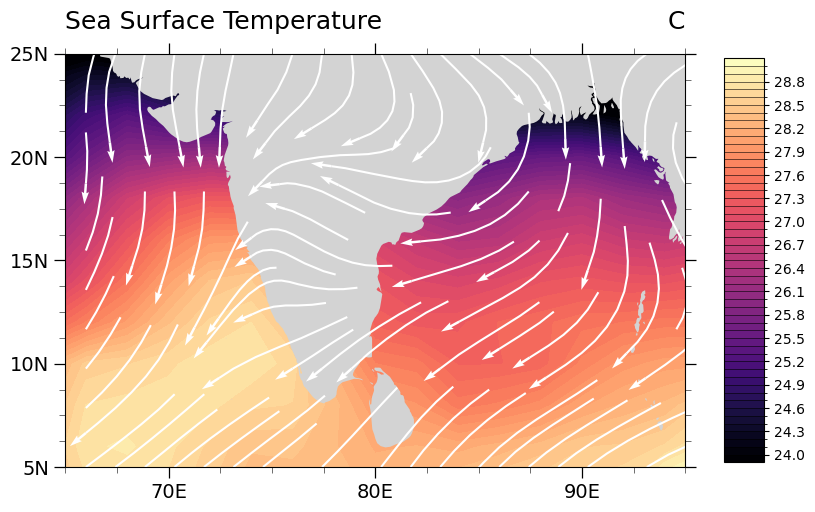

In [59]:
# Define map projection to use
proj = ccrs.PlateCarree()

# Generate figure (set its size (width, height) in inches)
plt.figure(figsize=(10, 7))

# Define axis using Cartopy and zoom in on the region of interest
ax = plt.axes(projection=proj)
ax.set_extent((66, 96, 5, 25), crs=ccrs.PlateCarree())

# Create the filled contour plot
sst_plot = sst.plot.contourf(
    ax=ax,
    transform=proj,
    levels=51,
    vmin=24,
    vmax=29,
    cmap="magma",
    add_colorbar=False,
)

# Remove default x and y labels from plot
plt.xlabel("")
plt.ylabel("")

# add land feature
ax.add_feature(cfeature.LAND, facecolor="lightgrey", zorder=1)

# Add streamplots
stream = plt.streamplot(lon_uv,
    lat_uv,
    u,
    v,
    color='white',
    arrowsize=0,
    density=.75,
    maxlength=.5)

# Extract the end points of streamlines and their directions
end_points_x = []
end_points_y = []
directions_u = []
directions_v = []

for line in stream.lines.get_segments():
    end_points_x.append(line[-1, 0])
    end_points_y.append(line[-1, 1])
    # Calculate direction from the second last point to the last point
    dx = line[-1, 0] - line[-2, 0]
    dy = line[-1, 1] - line[-2, 1]
    norm = np.sqrt(dx**2 + dy**2)
    directions_u.append(dx / norm)
    directions_v.append(dy / norm)

# Add quiver arrows at the end points of the streamlines
ax.quiver(end_points_x, end_points_y, directions_u, directions_v,
          color='white', scale=1, scale_units='xy', width=0.004)

# Use geocat-viz utility function to format title
gv.set_titles_and_labels(ax,
                         maintitle='',
                         maintitlefontsize=18,
                         lefttitle="Sea Surface Temperature",
                         lefttitlefontsize=18,
                         righttitle="C",
                         righttitlefontsize=18,
                         xlabel=None,
                         ylabel=None,
                         labelfontsize=16)

# Format tick labels as latitude and longitudes
gv.add_lat_lon_ticklabels(ax=ax)

# Use geocat-viz utility function to customize tick marks
gv.set_axes_limits_and_ticks(ax,
                             xlim=(65, 95),
                             ylim=(5, 25),
                             xticks=range(70, 95, 10),
                             yticks=range(5, 27, 5))

# Remove degree symbol from tick labels
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

# Add minor tick marks
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=4,
                         labelsize=14)

# Add and customize colorbar
cbar_ticks = np.arange(24, 28.8, .3)
plt.colorbar(ax=ax,
             mappable=sst_plot,
             extendrect=True,
             extendfrac='auto',
             shrink=0.75,
             aspect=10,
             ticks=cbar_ticks,
             drawedges=True)

# Show the plot
plt.show()


/Users/jkent/miniconda3/envs/geocat-examples/lib/python3.11/site-packages/matplotlib/patches.py:3355: RuntimeWarning: invalid value encountered in scalar divide
  cos_t, sin_t = head_length / head_dist, head_width / head_dist
/var/folders/dd/_xm_pbpd3flgbvbnt7qhd70snnbpj_/T/ipykernel_94298/877459032.py:67: RuntimeWarning: invalid value encountered in scalar divide
  directions_u.append(dx / norm)
/var/folders/dd/_xm_pbpd3flgbvbnt7qhd70snnbpj_/T/ipykernel_94298/877459032.py:68: RuntimeWarning: invalid value encountered in scalar divide
  directions_v.append(dy / norm)
/Users/jkent/miniconda3/envs/geocat-examples/lib/python3.11/site-packages/matplotlib/patches.py:3355: RuntimeWarning: invalid value encountered in scalar divide
  cos_t, sin_t = head_length / head_dist, head_width / head_dist
/Users/jkent/miniconda3/envs/geocat-examples/lib/python3.11/site-packages/matplotlib/patches.py:3355: RuntimeWarning: invalid value encountered in scalar divide
  cos_t, sin_t = head_length / head_dis

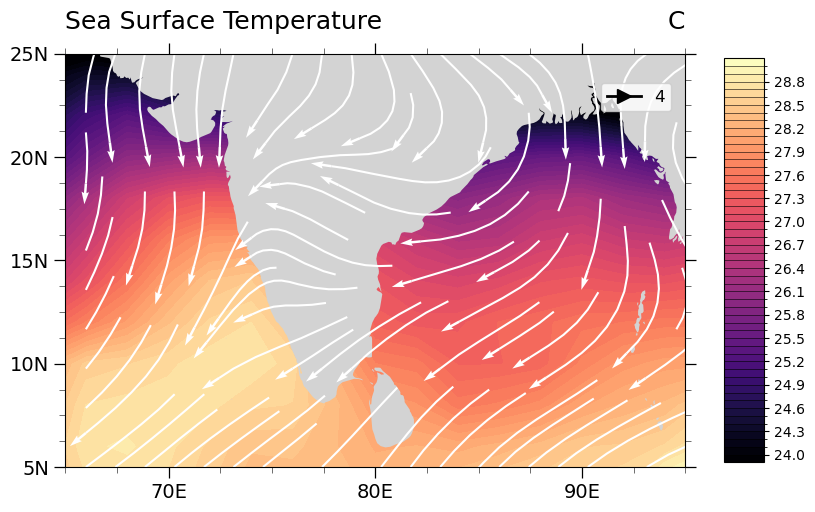

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import geocat.viz as gv
from matplotlib.lines import Line2D
import xarray as xr

# Assuming you have these variables already defined
# sst, lon_uv, lat_uv, u, v

# Define map projection to use
proj = ccrs.PlateCarree()

# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(10, 7))

# Define axis using Cartopy and zoom in on the region of interest
ax = plt.axes(projection=proj)
ax.set_extent((66, 96, 5, 25), crs=ccrs.PlateCarree())

# Create the filled contour plot
sst_plot = sst.plot.contourf(
    ax=ax,
    transform=proj,
    levels=51,
    vmin=24,
    vmax=29,
    cmap="magma",
    add_colorbar=False,
)

# Remove default x and y labels from plot
plt.xlabel("")
plt.ylabel("")

# Add land feature
ax.add_feature(cfeature.LAND, facecolor="lightgrey", zorder=1)

# Add streamplots
stream = plt.streamplot(
    lon_uv,
    lat_uv,
    u,
    v,
    color='white',
    arrowsize=0,
    density=.75,
    maxlength=.5,
    transform=proj
)

# Extract the end points of streamlines and their directions
end_points_x = []
end_points_y = []
directions_u = []
directions_v = []

for line in stream.lines.get_segments():
    end_points_x.append(line[-1, 0])
    end_points_y.append(line[-1, 1])
    # Calculate direction from the second last point to the last point
    dx = line[-1, 0] - line[-2, 0]
    dy = line[-1, 1] - line[-2, 1]
    norm = np.sqrt(dx**2 + dy**2)
    directions_u.append(dx / norm)
    directions_v.append(dy / norm)

# Add quiver arrows at the end points of the streamlines
ax.quiver(end_points_x, end_points_y, directions_u, directions_v,
          color='white', scale=1, scale_units='xy', width=0.004, transform=proj)

# Add custom legend
legend_elements = [
    Line2D([0], [0], color='black', lw=2, marker='>', markersize=10, label='4')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12, bbox_to_anchor=(.85, .95))

# Use geocat-viz utility function to format title
gv.set_titles_and_labels(ax,
                         maintitle='',
                         maintitlefontsize=18,
                         lefttitle="Sea Surface Temperature",
                         lefttitlefontsize=18,
                         righttitle="C",
                         righttitlefontsize=18,
                         xlabel=None,
                         ylabel=None,
                         labelfontsize=16)

# Format tick labels as latitude and longitudes
gv.add_lat_lon_ticklabels(ax=ax)

# Use geocat-viz utility function to customize tick marks
gv.set_axes_limits_and_ticks(ax,
                             xlim=(65, 95),
                             ylim=(5, 25),
                             xticks=range(70, 95, 10),
                             yticks=range(5, 27, 5))

# Remove degree symbol from tick labels
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

# Add minor tick marks
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=4,
                         labelsize=14)

# Add and customize colorbar
cbar_ticks = np.arange(24, 28.8, .3)
plt.colorbar(ax=ax,
             mappable=sst_plot,
             extendrect=True,
             extendfrac='auto',
             shrink=0.75,
             aspect=10,
             ticks=cbar_ticks,
             drawedges=True)

# Show the plot
plt.show()
